### Various CNN Architectures on MNIST Dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


### Parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
img_rows, img_cols = 28, 28

### Loading the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Data Normalization

In [0]:
x_train /= 255
x_test /= 255

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### One Hot Encoding of data

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model 1 - 2 Conv.Layers -> Max Pooling Layer -> Dense Layers, Kernel Sizes -> (3,3),Stride -> (1,1) 

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 185us/step - loss: 0.2711 - acc: 0.9155 - val_loss: 0.0522 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0881 - acc: 0.9734 - val_loss: 0.0396 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0672 - acc: 0.9800 - val_loss: 0.0339 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0553 - acc: 0.9837 - val_loss: 0.0327 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0476 - acc: 0.9859 - val_loss: 0.0289 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0415 - acc: 0.9875 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0369 - acc: 0.9890 - val_loss: 0.0302 -

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026473936617426534
Test accuracy: 0.9915


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

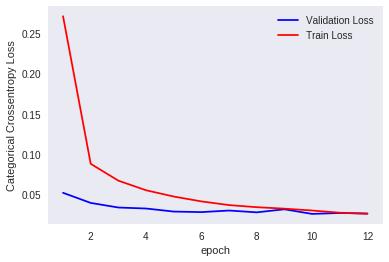

In [14]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 2 - 2 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers, Kernel Sizes -> (3,3),Stride -> (1,1)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(48, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 48)          76848     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 48)          0         
__________

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.3101 - acc: 0.9020 - val_loss: 0.0538 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0922 - acc: 0.9721 - val_loss: 0.0310 - val_acc: 0.9903
Epoch 3/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0677 - acc: 0.9798 - val_loss: 0.0250 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0564 - acc: 0.9834 - val_loss: 0.0240 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0497 - acc: 0.9852 - val_loss: 0.0245 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0440 - acc: 0.9868 - val_loss: 0.0240 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.016197610618577163
Test accuracy: 0.9945


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

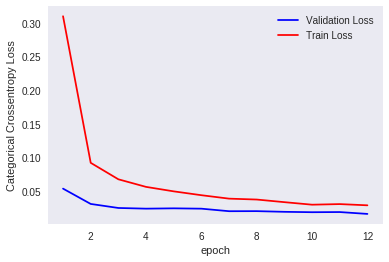

In [18]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 3 - 2 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers, Kernel Sizes -> (3,3) (5,5),Stride -> (2,2)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,strides=(2,2),kernel_initializer='he_uniform'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 1, 32)          0         
__________

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.9709 - acc: 0.6688 - val_loss: 0.1504 - val_acc: 0.9615
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.3179 - acc: 0.9125 - val_loss: 0.0826 - val_acc: 0.9783
Epoch 3/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.2171 - acc: 0.9436 - val_loss: 0.0648 - val_acc: 0.9817
Epoch 4/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1800 - acc: 0.9546 - val_loss: 0.0558 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.1564 - acc: 0.9604 - val_loss: 0.0438 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.1360 - acc: 0.9655 - val_loss: 0.0485 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.1240 - acc: 0.9688 - val_loss: 0.0447 - 

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04316723841981484
Test accuracy: 0.9892


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

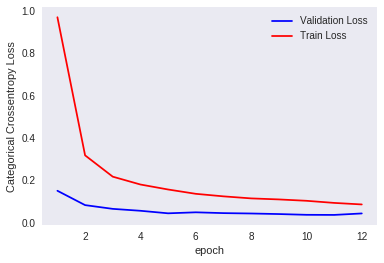

In [22]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 4 - 3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers, Kernel Sizes -> (3,3) (5,5),Stride -> (2,2)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,strides=(2,2),kernel_initializer='he_uniform'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
__________

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 169us/step - loss: 1.7509 - acc: 0.3481 - val_loss: 1.0950 - val_acc: 0.6055
Epoch 2/12
60000/60000 [==============================] - 9s 145us/step - loss: 1.0255 - acc: 0.6022 - val_loss: 0.6452 - val_acc: 0.7452
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.7806 - acc: 0.6864 - val_loss: 0.5940 - val_acc: 0.7168
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.6847 - acc: 0.7188 - val_loss: 0.4893 - val_acc: 0.7664
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.6264 - acc: 0.7374 - val_loss: 0.4625 - val_acc: 0.7681
Epoch 6/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.5930 - acc: 0.7479 - val_loss: 0.4616 - val_acc: 0.7708
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.5617 - acc: 0.7542 - val_loss: 0.4300 -

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40402277054786684
Test accuracy: 0.7862


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

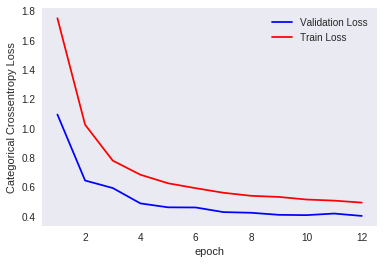

In [26]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 5 - 3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers, Kernel Sizes -> (3,3) (5,5),Stride -> (1,1)

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape,strides=(1,1),kernel_initializer='he_uniform'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         204928    
__________

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 282us/step - loss: 1.2012 - acc: 0.5695 - val_loss: 0.1499 - val_acc: 0.9709
Epoch 2/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.3408 - acc: 0.9063 - val_loss: 0.0795 - val_acc: 0.9852
Epoch 3/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.2207 - acc: 0.9437 - val_loss: 0.0598 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.1771 - acc: 0.9546 - val_loss: 0.0603 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.1646 - acc: 0.9597 - val_loss: 0.0513 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.1448 - acc: 0.9634 - val_loss: 0.0460 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.1391 - acc: 0.9658 - val_loss: 0.

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.051926155737928185
Test accuracy: 0.9905


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

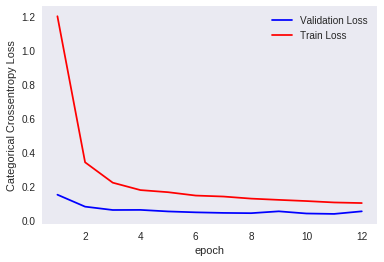

In [30]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 6 - 3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers, Kernel Sizes -> (3,3) (5,5) (7,7) ,Stride -> (1,1)

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,strides=(1,1),kernel_initializer='he_uniform'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 64)          73792     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 285us/step - loss: 1.1907 - acc: 0.5778 - val_loss: 0.1048 - val_acc: 0.9747
Epoch 2/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.3247 - acc: 0.9127 - val_loss: 0.0900 - val_acc: 0.9805
Epoch 3/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.2341 - acc: 0.9401 - val_loss: 0.0801 - val_acc: 0.9823
Epoch 4/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.1942 - acc: 0.9517 - val_loss: 0.0599 - val_acc: 0.9863
Epoch 5/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.1718 - acc: 0.9578 - val_loss: 0.0595 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.1484 - acc: 0.9629 - val_loss: 0.0633 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.1434 - acc: 0.9653 - val_loss: 0.

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.059650832169331446
Test accuracy: 0.9907


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

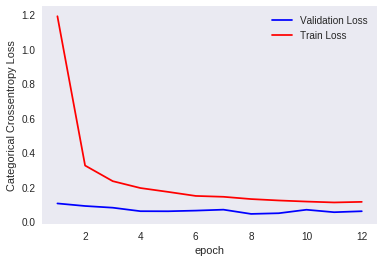

In [34]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Summary

Model | Optimizer | Kernel Sizes | Stride | Loss on Test set | Accuracy on Test set |
--- | --- | -- | -- | -- | -- |
2 Conv.Layers -> Max Pooling Layer -> Dense Layers| Adam | (3,3) | (1,1) | 0.026 | 99.18 |
2 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers  | Adam | (3,3) | (1,1) | 0.018| 99.37 |
2 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers | Adam | (3,3) (5,5) | (2,2) |0.042 | 98.95|
3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers | Adam | (3,3) (5,5) | (2,2) |0.258 | 82.91|
3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers | Adam | (3,3) (5,5)| (1,1) | 0.041 | 99.29|
3 Conv.Layers -> Max Pooling Layer -> 1 Conv.Layer -> Max Pooling Layer->Dense Layers | Adam | (3,3) (5,5) (7,7)  | (1,1) | 0.038 |99.19 |